In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Val\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Working with text 
## exercise from lecture 

In [2]:
alice = pd.read_csv("data/alice.txt", sep="\t", engine='python', on_bad_lines='skip') 
alice

,"Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll"
0,This eBook is for the use of anyone anywhere a...
1,almost no restrictions whatsoever. You may co...
2,re-use it under the terms of the Project Guten...
3,with this eBook or online at www.gutenberg.org
4,Title: Alice's Adventures in Wonderland
...,...
1274,http://www.gutenberg.org
1275,This Web site includes information about Proje...
1276,including how to make donations to the Project...
1277,"Archive Foundation, how to help produce our ne..."


In [3]:
eu_restaurants = pd.read_csv("data/European Restaurant Reviews.csv" , header = None)
eu_restaurants.columns = ["country", "restaurant_name", "sentiment", "review_title", "review_date", "review"] 
eu_restaurants

,country,restaurant_name,sentiment,review_title,review_date,review
0,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
1,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
2,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
3,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
4,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
...,...,...,...,...,...,...
1498,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,Oct 2016 •,Despite the other reviews saying that this is ...
1499,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,Oct 2016 •,beer is good. food is awfull The only decent...
1500,Cuba,Old Square (Plaza Vieja),Negative,brewery,Oct 2016 •,"for terrible service of a truly comedic level,..."
1501,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,Oct 2016 •,We visited the Havana's Club Museum which is l...


In [4]:
eu_restaurants.describe

<bound method NDFrame.describe of       country            restaurant_name  sentiment  \
0     Country            Restaurant Name  Sentiment   
1      France  The Frog at Bercy Village   Negative   
2      France  The Frog at Bercy Village   Negative   
3      France  The Frog at Bercy Village   Negative   
4      France  The Frog at Bercy Village   Negative   
...       ...                        ...        ...   
1498     Cuba   Old Square (Plaza Vieja)   Negative   
1499     Cuba   Old Square (Plaza Vieja)   Negative   
1500     Cuba   Old Square (Plaza Vieja)   Negative   
1501     Cuba   Old Square (Plaza Vieja)   Negative   
1502     Cuba   Old Square (Plaza Vieja)   Negative   

                                  review_title  review_date  \
0                                 Review Title  Review Date   
1                                 Rude manager   May 2024 •   
2                         A big disappointment   Feb 2024 •   
3                 Pretty Place with Bland Food   Nov 

In [5]:
eu_restaurants.info

<bound method DataFrame.info of       country            restaurant_name  sentiment  \
0     Country            Restaurant Name  Sentiment   
1      France  The Frog at Bercy Village   Negative   
2      France  The Frog at Bercy Village   Negative   
3      France  The Frog at Bercy Village   Negative   
4      France  The Frog at Bercy Village   Negative   
...       ...                        ...        ...   
1498     Cuba   Old Square (Plaza Vieja)   Negative   
1499     Cuba   Old Square (Plaza Vieja)   Negative   
1500     Cuba   Old Square (Plaza Vieja)   Negative   
1501     Cuba   Old Square (Plaza Vieja)   Negative   
1502     Cuba   Old Square (Plaza Vieja)   Negative   

                                  review_title  review_date  \
0                                 Review Title  Review Date   
1                                 Rude manager   May 2024 •   
2                         A big disappointment   Feb 2024 •   
3                 Pretty Place with Bland Food   Nov 20

In [6]:
# info about column Country
eu_restaurants.country.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1503 entries, 0 to 1502
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
1503 non-null   object
dtypes: object(1)
memory usage: 11.9+ KB


In [7]:
# unique restaurants 
eu_restaurants.country.nunique()

8

In [8]:
with open("data/European Restaurant Reviews.csv", "r", encoding='utf-8') as file:
    print(file.read()[:3443])

Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.
France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20 minutes they brought me another steak that was completely rare, I left all the steak , and they asked me about it but charged me the fool price."
France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, albeit but somewhat slow service. The offerings are pleasingly presented but most everything has no taste. It was as though ingredients were just assembled without seasoning: a lovely restaurant, except for the food."
France,The Frog at

In [9]:
# r - read
# rb - read bytes

with open("data/alice.txt", "rb") as file:
    print(file.read()[:1535])

b"\r\n\r\n\r\nProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Alice's Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: June 25, 2008 [EBook #11]\r\nLast Updated: October 6, 2016\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\r\n\r\n\r\n\r\nProduced by Arthur DiBianca and David Widger\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nALICE\xe2\x80\x99S ADVENTURES\r\nIN WONDERLAND\r\n\r\n\r\nBy Lewis Carroll\r\n\r\n\r\n\r\nTHE MILLENNIUM FULCRUM EDITION 3.0\r\n\r\n\r\n\r\n\r\n\r\nContents\r\nCHAPTER I. \tDown the Rabbit-Hole\r\nCHAPTER II. \t

In [10]:
# use after "r" , encoding='utf-8' if cant read utf-8 symbols
with open("data/alice.txt", "r", encoding='utf-8') as file:
    print(file.read()[:100])




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use


In [11]:
eu_restaurants.columns

Index(['country', 'restaurant_name', 'sentiment', 'review_title',
       'review_date', 'review'],
      dtype='object')

In [12]:
eu_restaurants.review

0                                                  Review
1       The manager became agressive when I said the c...
2       I ordered a beef fillet ask to be done medium,...
3       This is an attractive venue with welcoming, al...
4       Sadly I  used the high TripAdvisor rating too ...
                              ...                        
1498    Despite the other reviews saying that this is ...
1499    beer is good.  food is awfull  The only decent...
1500    for terrible service of a truly comedic level,...
1501    We visited the Havana's Club Museum which is l...
1502    Food and service was awful. Very pretty stop. ...
Name: review, Length: 1503, dtype: object

In [13]:
eu_restaurants.review_date

0       Review Date
1        May 2024 •
2        Feb 2024 •
3        Nov 2023 •
4        Mar 2023 •
           ...     
1498     Oct 2016 •
1499     Oct 2016 •
1500     Oct 2016 •
1501     Oct 2016 •
1502     Oct 2016 •
Name: review_date, Length: 1503, dtype: object

това са просто текстове и няма начин да ги обърнем в числа.
но можем да видим дължината на всеки един от записите в дадена колона, примерно колоната __review__

In [14]:
eu_restaurants.review.str.len().sort_values(ascending = False)

103    3679
28     3555
67     3516
99     3106
102    3087
       ... 
537      71
145      71
120      71
184      10
0         6
Name: review, Length: 1503, dtype: int64

In [15]:
# средна дължина на текста
eu_restaurants.review.str.len().mean()

366.19827012641383

In [16]:
# медианната дължина на текста
eu_restaurants.review.str.len().median()

235.0

 средната дължина на текста е 366.19827012641383, а медианната дължина е 235.0
 следователно ___повечето___ текстове са с дължина ___между___ 235 и 366


In [17]:
for sentiment, group_data in eu_restaurants.groupby('sentiment'):
    print(group_data)
    break

     country            restaurant_name sentiment  \
1     France  The Frog at Bercy Village  Negative   
2     France  The Frog at Bercy Village  Negative   
3     France  The Frog at Bercy Village  Negative   
4     France  The Frog at Bercy Village  Negative   
5     France  The Frog at Bercy Village  Negative   
...      ...                        ...       ...   
1498    Cuba   Old Square (Plaza Vieja)  Negative   
1499    Cuba   Old Square (Plaza Vieja)  Negative   
1500    Cuba   Old Square (Plaza Vieja)  Negative   
1501    Cuba   Old Square (Plaza Vieja)  Negative   
1502    Cuba   Old Square (Plaza Vieja)  Negative   

                                   review_title review_date  \
1                                  Rude manager  May 2024 •   
2                          A big disappointment  Feb 2024 •   
3                  Pretty Place with Bland Food  Nov 2023 •   
4      Great service and wine but inedible food  Mar 2023 •   
5     Avoid- Worst meal in Rome - possibly ever 

In [18]:
for sentiment, group_data in eu_restaurants.groupby('sentiment'):
    print(group_data.shape)
    break

(265, 6)


In [19]:
for sentiment, group_data in eu_restaurants.groupby('sentiment'):
    print(group_data.dtypes)
    break

country            object
restaurant_name    object
sentiment          object
review_title       object
review_date        object
review             object
dtype: object


In [20]:
for sentiment, group_data in eu_restaurants.groupby('sentiment'):
    print(sentiment, group_data.restaurant_name.str.len().median())

Negative 25.0
Positive 25.0
Sentiment 15.0


Четем от файл:

In [21]:
text= ""
with open("data/alice.txt", "r", encoding='utf-8') as f:
    text = f.read()
print(len(text))

164108


след като видяхме как се чете от файл,следва статистиката. По-горе видяхме как изследвахме дължината, но може да проверим кои са най-често срещаните символи, най-често срещани думи и т.н.
Ще импортнем брояч
from collections import Counter

ако поискам първия запис, това ще бъде:

In [22]:
alice.loc[0]

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll    This eBook is for the use of anyone anywhere a...
Name: 0, dtype: object

In [23]:
eu_restaurants.loc[0].review

'Review'

In [24]:
eu_restaurants.loc[1].review

'The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.'

може да си направим един _Counter_, който съдържа този стринг.
Така можем да разберем кои са символите в  стринга и колко пъти се срещат.

In [25]:
Counter(eu_restaurants.loc[1].review)

Counter({' ': 28,
         'e': 18,
         'a': 15,
         'r': 9,
         'n': 8,
         's': 8,
         'o': 6,
         'h': 5,
         'i': 5,
         'w': 5,
         'm': 4,
         'd': 4,
         't': 4,
         '.': 4,
         'g': 3,
         'b': 3,
         'c': 3,
         'y': 3,
         'T': 2,
         'v': 2,
         'I': 2,
         'S': 1,
         'u': 1,
         'x': 1,
         'p': 1,
         'R': 1})

In [26]:
# закоментирам, защото изкарва много редове
# Counter(eu_restaurants.review.ravel())

In [27]:
eu_restaurants.review.to_numpy()

array(['Review',
       'The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.',
       'I ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20 minutes they brought me another steak that was completely rare, I left all the steak , and they asked me about it but charged me the fool price.',
       ...,
       "for terrible service of a truly comedic level, have a 2/3 full pint of beer in the little microbrew brew on the square. not really the square's fault.",
       "We visited the Havana's Club Museum which is located in the old havana area , and we weren't impressed at all. However, my family and I took a tour bus all around old Havana, Center of Havana where all nice hotel such National hotel are located, and East of Havana such Miramar, and we had a lot of fun. In addition, we paid only $5 for this two hour to

За да вземем всички символи от текста, трябвa да ги конкатенираме заедно. Така ще получим всичките текстове заедно. 
Защо ни трябват заедно - за да разберем разпределението на символи във всичките заедно.

In [28]:
all_texts = " ".join(eu_restaurants.review.to_numpy())
# all_texts

In [29]:
# Counter(all_texts)

In [30]:
# Counter(all_texts.lower())

In [31]:
frequences = Counter(all_texts.lower()).most_common(20)

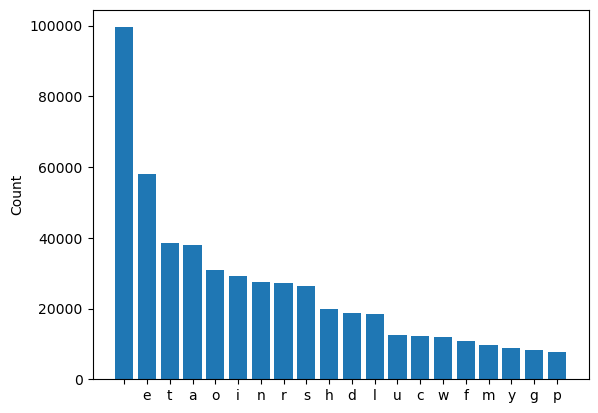

In [32]:
plt.bar([symbol for symbol, frequency in frequences], [frequency for symbol, frequency in frequences])
plt.ylabel("Count")
plt.show()

Досега правихме анализ по символи. Нека сега направим анализ по думи

In [33]:
words = all_texts.split(" ")

In [34]:
# проверяваме дали има останали празни думи
np.array([word == "" for word in words]).any()

True

In [35]:
# да видим коя думи колко пъти се среща
# Counter(words)

In [36]:
# stopwords.words("english")

In [37]:
eu_restaurants.review.apply(lambda text: text.split(" "))

0                                                [Review]
1       [The, manager, became, agressive, when, I, sai...
2       [I, ordered, a, beef, fillet, ask, to, be, don...
3       [This, is, an, attractive, venue, with, welcom...
4       [Sadly, I, , used, the, high, TripAdvisor, rat...
                              ...                        
1498    [Despite, the, other, reviews, saying, that, t...
1499    [beer, is, good., , food, is, awfull, , The, o...
1500    [for, terrible, service, of, a, truly, comedic...
1501    [We, visited, the, Havana's, Club, Museum, whi...
1502    [Food, and, service, was, awful., Very, pretty...
Name: review, Length: 1503, dtype: object

In [38]:
eu_restaurants.review[1]

'The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.'

In [39]:
eu_restaurants.review.str.split(" ")

0                                                [Review]
1       [The, manager, became, agressive, when, I, sai...
2       [I, ordered, a, beef, fillet, ask, to, be, don...
3       [This, is, an, attractive, venue, with, welcom...
4       [Sadly, I, , used, the, high, TripAdvisor, rat...
                              ...                        
1498    [Despite, the, other, reviews, saying, that, t...
1499    [beer, is, good., , food, is, awfull, , The, o...
1500    [for, terrible, service, of, a, truly, comedic...
1501    [We, visited, the, Havana's, Club, Museum, whi...
1502    [Food, and, service, was, awful., Very, pretty...
Name: review, Length: 1503, dtype: object

In [40]:
eu_restaurants.review.str.split("\s+")
#  \s+- разделяме по един или повече уайд спейс символи като нови редове, табове, интервали и други тоакива
# когато разделяме един текст на много на брой парчета се нарича tokanization

0                                                [Review]
1       [The, manager, became, agressive, when, I, sai...
2       [I, ordered, a, beef, fillet, ask, to, be, don...
3       [This, is, an, attractive, venue, with, welcom...
4       [Sadly, I, used, the, high, TripAdvisor, ratin...
                              ...                        
1498    [Despite, the, other, reviews, saying, that, t...
1499    [beer, is, good., food, is, awfull, The, only,...
1500    [for, terrible, service, of, a, truly, comedic...
1501    [We, visited, the, Havana's, Club, Museum, whi...
1502    [Food, and, service, was, awful., Very, pretty...
Name: review, Length: 1503, dtype: object

In [41]:
eu_restaurants.review.str.split

<bound method StringMethods.split of <pandas.core.strings.accessor.StringMethods object at 0x000002CBE6733190>>